## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.585511   726.390836  0.415422  7.861805  1.356022
1  71.167567   144.966125  0.516201  2.299368  0.929238
2  13.831706  1644.349825  0.415030  2.354034  1.424854
3  91.915302  1306.958600  0.855297  5.875971  1.511322
4  13.906686  1220.943863  0.978195  3.295816  1.720933


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.03691 | train_mse: 1.81833 | train_mae: 1.0568  |  0:00:00s
epoch 1  | loss: 0.53697 | train_mse: 1.50556 | train_mae: 0.99178 |  0:00:00s
epoch 2  | loss: 0.82817 | train_mse: 1.46379 | train_mae: 0.97351 |  0:00:00s


epoch 3  | loss: 0.52348 | train_mse: 1.20702 | train_mae: 0.86076 |  0:00:00s
epoch 4  | loss: 0.62825 | train_mse: 1.29185 | train_mae: 0.85538 |  0:00:00s
epoch 5  | loss: 0.51106 | train_mse: 1.05587 | train_mae: 0.82164 |  0:00:00s


epoch 6  | loss: 0.38037 | train_mse: 1.01742 | train_mae: 0.78461 |  0:00:00s
epoch 7  | loss: 0.45525 | train_mse: 0.83761 | train_mae: 0.67822 |  0:00:00s
epoch 8  | loss: 0.33239 | train_mse: 0.66367 | train_mae: 0.57686 |  0:00:00s


epoch 9  | loss: 0.44726 | train_mse: 0.57903 | train_mae: 0.5554  |  0:00:00s
epoch 10 | loss: 0.35135 | train_mse: 0.5739  | train_mae: 0.57079 |  0:00:01s
epoch 11 | loss: 0.33942 | train_mse: 0.50164 | train_mae: 0.54871 |  0:00:01s


epoch 12 | loss: 0.42712 | train_mse: 0.45362 | train_mae: 0.51283 |  0:00:01s
epoch 13 | loss: 0.2808  | train_mse: 0.48079 | train_mae: 0.50568 |  0:00:01s
epoch 14 | loss: 0.30501 | train_mse: 0.47497 | train_mae: 0.52652 |  0:00:01s


epoch 15 | loss: 0.47082 | train_mse: 0.4946  | train_mae: 0.55091 |  0:00:01s
epoch 16 | loss: 0.28792 | train_mse: 0.40995 | train_mae: 0.51657 |  0:00:01s
epoch 17 | loss: 0.34109 | train_mse: 0.3074  | train_mae: 0.4508  |  0:00:01s


epoch 18 | loss: 0.2952  | train_mse: 0.2723  | train_mae: 0.41009 |  0:00:01s
epoch 19 | loss: 0.30601 | train_mse: 0.46095 | train_mae: 0.49261 |  0:00:01s
epoch 20 | loss: 0.31739 | train_mse: 0.45191 | train_mae: 0.48034 |  0:00:01s


epoch 21 | loss: 0.22147 | train_mse: 0.41298 | train_mae: 0.47431 |  0:00:01s
epoch 22 | loss: 0.32157 | train_mse: 0.31653 | train_mae: 0.43713 |  0:00:02s
epoch 23 | loss: 0.19403 | train_mse: 0.24416 | train_mae: 0.39091 |  0:00:02s


epoch 24 | loss: 0.29638 | train_mse: 0.23379 | train_mae: 0.37377 |  0:00:02s
epoch 25 | loss: 0.27424 | train_mse: 0.15734 | train_mae: 0.31324 |  0:00:02s
epoch 26 | loss: 0.44086 | train_mse: 0.18097 | train_mae: 0.33241 |  0:00:02s


epoch 27 | loss: 0.27238 | train_mse: 0.22074 | train_mae: 0.36323 |  0:00:02s
epoch 28 | loss: 0.29469 | train_mse: 0.23993 | train_mae: 0.36799 |  0:00:02s
epoch 29 | loss: 0.24253 | train_mse: 0.21876 | train_mae: 0.38614 |  0:00:02s


epoch 30 | loss: 0.20524 | train_mse: 0.22041 | train_mae: 0.36103 |  0:00:02s
epoch 31 | loss: 0.19936 | train_mse: 0.21862 | train_mae: 0.36993 |  0:00:02s
epoch 32 | loss: 0.21425 | train_mse: 0.19514 | train_mae: 0.3407  |  0:00:02s


epoch 33 | loss: 0.24325 | train_mse: 0.1601  | train_mae: 0.3173  |  0:00:02s
epoch 34 | loss: 0.15198 | train_mse: 0.15004 | train_mae: 0.3086  |  0:00:03s
epoch 35 | loss: 0.29626 | train_mse: 0.12233 | train_mae: 0.2744  |  0:00:03s


epoch 36 | loss: 0.20548 | train_mse: 0.12589 | train_mae: 0.26543 |  0:00:03s
epoch 37 | loss: 0.22266 | train_mse: 0.13071 | train_mae: 0.28853 |  0:00:03s
epoch 38 | loss: 0.24054 | train_mse: 0.15482 | train_mae: 0.3184  |  0:00:03s


epoch 39 | loss: 0.19299 | train_mse: 0.11116 | train_mae: 0.26723 |  0:00:03s
epoch 40 | loss: 0.23787 | train_mse: 0.11967 | train_mae: 0.26188 |  0:00:03s
epoch 41 | loss: 0.2082  | train_mse: 0.12712 | train_mae: 0.26358 |  0:00:03s


epoch 42 | loss: 0.2311  | train_mse: 0.1051  | train_mae: 0.23826 |  0:00:03s
epoch 43 | loss: 0.22198 | train_mse: 0.10423 | train_mae: 0.23336 |  0:00:03s
epoch 44 | loss: 0.25334 | train_mse: 0.11312 | train_mae: 0.24185 |  0:00:03s


epoch 45 | loss: 0.15006 | train_mse: 0.13927 | train_mae: 0.28038 |  0:00:04s
epoch 46 | loss: 0.2529  | train_mse: 0.11871 | train_mae: 0.26751 |  0:00:04s
epoch 47 | loss: 0.31548 | train_mse: 0.09834 | train_mae: 0.24033 |  0:00:04s


epoch 48 | loss: 0.20228 | train_mse: 0.11308 | train_mae: 0.24492 |  0:00:04s
epoch 49 | loss: 0.13911 | train_mse: 0.12484 | train_mae: 0.25729 |  0:00:04s
epoch 50 | loss: 0.13435 | train_mse: 0.12072 | train_mae: 0.27115 |  0:00:04s


epoch 51 | loss: 0.20316 | train_mse: 0.11883 | train_mae: 0.2679  |  0:00:04s
epoch 52 | loss: 0.20727 | train_mse: 0.12994 | train_mae: 0.26988 |  0:00:04s
epoch 53 | loss: 0.14801 | train_mse: 0.1508  | train_mae: 0.29617 |  0:00:04s


epoch 54 | loss: 0.35965 | train_mse: 0.16732 | train_mae: 0.28233 |  0:00:04s
epoch 55 | loss: 0.29977 | train_mse: 0.18522 | train_mae: 0.32303 |  0:00:04s
epoch 56 | loss: 0.21642 | train_mse: 0.17034 | train_mae: 0.30958 |  0:00:04s


epoch 57 | loss: 0.21619 | train_mse: 0.13704 | train_mae: 0.27384 |  0:00:05s
epoch 58 | loss: 0.2152  | train_mse: 0.12652 | train_mae: 0.27898 |  0:00:05s
epoch 59 | loss: 0.29691 | train_mse: 0.1472  | train_mae: 0.3112  |  0:00:05s


epoch 60 | loss: 0.2261  | train_mse: 0.15025 | train_mae: 0.30814 |  0:00:05s
epoch 61 | loss: 0.18899 | train_mse: 0.17233 | train_mae: 0.32323 |  0:00:05s
epoch 62 | loss: 0.16198 | train_mse: 0.13994 | train_mae: 0.28093 |  0:00:05s


epoch 63 | loss: 0.22551 | train_mse: 0.12226 | train_mae: 0.28074 |  0:00:05s
epoch 64 | loss: 0.22104 | train_mse: 0.1098  | train_mae: 0.26107 |  0:00:05s
epoch 65 | loss: 0.14936 | train_mse: 0.13424 | train_mae: 0.28657 |  0:00:05s


epoch 66 | loss: 0.19866 | train_mse: 0.15124 | train_mae: 0.29561 |  0:00:05s
epoch 67 | loss: 0.22876 | train_mse: 0.13096 | train_mae: 0.27914 |  0:00:05s
epoch 68 | loss: 0.16561 | train_mse: 0.10648 | train_mae: 0.2634  |  0:00:06s


epoch 69 | loss: 0.22668 | train_mse: 0.11414 | train_mae: 0.26871 |  0:00:06s
epoch 70 | loss: 0.15755 | train_mse: 0.10176 | train_mae: 0.26115 |  0:00:06s
epoch 71 | loss: 0.17046 | train_mse: 0.0961  | train_mae: 0.26539 |  0:00:06s


epoch 72 | loss: 0.23777 | train_mse: 0.1442  | train_mae: 0.29573 |  0:00:06s
epoch 73 | loss: 0.18438 | train_mse: 0.12602 | train_mae: 0.26606 |  0:00:06s
epoch 74 | loss: 0.26762 | train_mse: 0.08369 | train_mae: 0.22963 |  0:00:06s


epoch 75 | loss: 0.2141  | train_mse: 0.07936 | train_mae: 0.22171 |  0:00:06s
epoch 76 | loss: 0.09828 | train_mse: 0.08114 | train_mae: 0.22412 |  0:00:06s
epoch 77 | loss: 0.23788 | train_mse: 0.09036 | train_mae: 0.23774 |  0:00:06s


epoch 78 | loss: 0.22754 | train_mse: 0.1255  | train_mae: 0.2713  |  0:00:06s
epoch 79 | loss: 0.1857  | train_mse: 0.13723 | train_mae: 0.27731 |  0:00:06s
epoch 80 | loss: 0.14792 | train_mse: 0.11871 | train_mae: 0.26255 |  0:00:06s


epoch 81 | loss: 0.21725 | train_mse: 0.09499 | train_mae: 0.24587 |  0:00:07s
epoch 82 | loss: 0.22449 | train_mse: 0.11693 | train_mae: 0.26712 |  0:00:07s
epoch 83 | loss: 0.17434 | train_mse: 0.15324 | train_mae: 0.29774 |  0:00:07s


epoch 84 | loss: 0.18844 | train_mse: 0.15929 | train_mae: 0.30632 |  0:00:07s
epoch 85 | loss: 0.13625 | train_mse: 0.154   | train_mae: 0.28651 |  0:00:07s
epoch 86 | loss: 0.1141  | train_mse: 0.15921 | train_mae: 0.28531 |  0:00:07s


epoch 87 | loss: 0.17069 | train_mse: 0.14229 | train_mae: 0.27411 |  0:00:07s
epoch 88 | loss: 0.1152  | train_mse: 0.11028 | train_mae: 0.24641 |  0:00:07s
epoch 89 | loss: 0.18224 | train_mse: 0.11002 | train_mae: 0.25526 |  0:00:07s


epoch 90 | loss: 0.13607 | train_mse: 0.08961 | train_mae: 0.22343 |  0:00:07s
epoch 91 | loss: 0.14983 | train_mse: 0.08939 | train_mae: 0.22768 |  0:00:07s
epoch 92 | loss: 0.11337 | train_mse: 0.09632 | train_mae: 0.23583 |  0:00:07s


epoch 93 | loss: 0.19665 | train_mse: 0.09889 | train_mae: 0.23359 |  0:00:08s
epoch 94 | loss: 0.16489 | train_mse: 0.11776 | train_mae: 0.24381 |  0:00:08s
epoch 95 | loss: 0.13849 | train_mse: 0.09936 | train_mae: 0.22796 |  0:00:08s


epoch 96 | loss: 0.2107  | train_mse: 0.07874 | train_mae: 0.21123 |  0:00:08s
epoch 97 | loss: 0.17365 | train_mse: 0.07602 | train_mae: 0.21088 |  0:00:08s
epoch 98 | loss: 0.14264 | train_mse: 0.07643 | train_mae: 0.218   |  0:00:08s


epoch 99 | loss: 0.12829 | train_mse: 0.0743  | train_mae: 0.21225 |  0:00:08s
epoch 100| loss: 0.13354 | train_mse: 0.08603 | train_mae: 0.21814 |  0:00:08s
epoch 101| loss: 0.14434 | train_mse: 0.11183 | train_mae: 0.23438 |  0:00:08s


epoch 102| loss: 0.1542  | train_mse: 0.11785 | train_mae: 0.24346 |  0:00:08s
epoch 103| loss: 0.21551 | train_mse: 0.1077  | train_mae: 0.24586 |  0:00:08s
epoch 104| loss: 0.15825 | train_mse: 0.09195 | train_mae: 0.23455 |  0:00:09s


epoch 105| loss: 0.13029 | train_mse: 0.09801 | train_mae: 0.24357 |  0:00:09s
epoch 106| loss: 0.16304 | train_mse: 0.09986 | train_mae: 0.2412  |  0:00:09s
epoch 107| loss: 0.13059 | train_mse: 0.08967 | train_mae: 0.22893 |  0:00:09s


epoch 108| loss: 0.14395 | train_mse: 0.08451 | train_mae: 0.22168 |  0:00:09s
epoch 109| loss: 0.147   | train_mse: 0.08557 | train_mae: 0.22829 |  0:00:09s
epoch 110| loss: 0.16628 | train_mse: 0.08383 | train_mae: 0.225   |  0:00:09s


epoch 111| loss: 0.19631 | train_mse: 0.0809  | train_mae: 0.22109 |  0:00:09s
epoch 112| loss: 0.17856 | train_mse: 0.09692 | train_mae: 0.24573 |  0:00:09s
epoch 113| loss: 0.13669 | train_mse: 0.08252 | train_mae: 0.22096 |  0:00:09s


epoch 114| loss: 0.18106 | train_mse: 0.08318 | train_mae: 0.2177  |  0:00:09s
epoch 115| loss: 0.15899 | train_mse: 0.08655 | train_mae: 0.23248 |  0:00:09s
epoch 116| loss: 0.16171 | train_mse: 0.09265 | train_mae: 0.23518 |  0:00:10s


epoch 117| loss: 0.14141 | train_mse: 0.08524 | train_mae: 0.23272 |  0:00:10s
epoch 118| loss: 0.1233  | train_mse: 0.12878 | train_mae: 0.27662 |  0:00:10s
epoch 119| loss: 0.24607 | train_mse: 0.11629 | train_mae: 0.26102 |  0:00:10s


epoch 120| loss: 0.09998 | train_mse: 0.08781 | train_mae: 0.23789 |  0:00:10s
epoch 121| loss: 0.30354 | train_mse: 0.1125  | train_mae: 0.2621  |  0:00:10s


epoch 122| loss: 0.21293 | train_mse: 0.09235 | train_mae: 0.24221 |  0:00:10s
epoch 123| loss: 0.13345 | train_mse: 0.09331 | train_mae: 0.24013 |  0:00:10s


epoch 124| loss: 0.18249 | train_mse: 0.09682 | train_mae: 0.23067 |  0:00:10s
epoch 125| loss: 0.14577 | train_mse: 0.09405 | train_mae: 0.22938 |  0:00:10s
epoch 126| loss: 0.13448 | train_mse: 0.0829  | train_mae: 0.22231 |  0:00:10s


epoch 127| loss: 0.11004 | train_mse: 0.08207 | train_mae: 0.22852 |  0:00:11s
epoch 128| loss: 0.11051 | train_mse: 0.07939 | train_mae: 0.22551 |  0:00:11s
epoch 129| loss: 0.17753 | train_mse: 0.07205 | train_mae: 0.20511 |  0:00:11s


epoch 130| loss: 0.12663 | train_mse: 0.07404 | train_mae: 0.20499 |  0:00:11s
epoch 131| loss: 0.14264 | train_mse: 0.0776  | train_mae: 0.20964 |  0:00:11s
epoch 132| loss: 0.28539 | train_mse: 0.07205 | train_mae: 0.20462 |  0:00:11s


epoch 133| loss: 0.14645 | train_mse: 0.07077 | train_mae: 0.19998 |  0:00:11s
epoch 134| loss: 0.09767 | train_mse: 0.08512 | train_mae: 0.22735 |  0:00:11s
epoch 135| loss: 0.10448 | train_mse: 0.08487 | train_mae: 0.23609 |  0:00:11s


epoch 136| loss: 0.09533 | train_mse: 0.07896 | train_mae: 0.23052 |  0:00:11s
epoch 137| loss: 0.13396 | train_mse: 0.07104 | train_mae: 0.21571 |  0:00:11s
epoch 138| loss: 0.10606 | train_mse: 0.07259 | train_mae: 0.20577 |  0:00:11s


epoch 139| loss: 0.16916 | train_mse: 0.07563 | train_mae: 0.21308 |  0:00:12s
epoch 140| loss: 0.13777 | train_mse: 0.07979 | train_mae: 0.22395 |  0:00:12s
epoch 141| loss: 0.19284 | train_mse: 0.08744 | train_mae: 0.23008 |  0:00:12s


epoch 142| loss: 0.12875 | train_mse: 0.07953 | train_mae: 0.22151 |  0:00:12s
epoch 143| loss: 0.13859 | train_mse: 0.07145 | train_mae: 0.20335 |  0:00:12s
epoch 144| loss: 0.14488 | train_mse: 0.06827 | train_mae: 0.20156 |  0:00:12s


epoch 145| loss: 0.14277 | train_mse: 0.08054 | train_mae: 0.2274  |  0:00:12s
epoch 146| loss: 0.1451  | train_mse: 0.07484 | train_mae: 0.22132 |  0:00:12s
epoch 147| loss: 0.20487 | train_mse: 0.07116 | train_mae: 0.2129  |  0:00:12s


epoch 148| loss: 0.14371 | train_mse: 0.09139 | train_mae: 0.23295 |  0:00:12s
epoch 149| loss: 0.14577 | train_mse: 0.09698 | train_mae: 0.2386  |  0:00:12s
epoch 150| loss: 0.09165 | train_mse: 0.08276 | train_mae: 0.2236  |  0:00:12s


epoch 151| loss: 0.12127 | train_mse: 0.07436 | train_mae: 0.21575 |  0:00:13s
epoch 152| loss: 0.14548 | train_mse: 0.06965 | train_mae: 0.20554 |  0:00:13s
epoch 153| loss: 0.11193 | train_mse: 0.07528 | train_mae: 0.21184 |  0:00:13s


epoch 154| loss: 0.27327 | train_mse: 0.09461 | train_mae: 0.23449 |  0:00:13s
epoch 155| loss: 0.12971 | train_mse: 0.09596 | train_mae: 0.23729 |  0:00:13s
epoch 156| loss: 0.13613 | train_mse: 0.10829 | train_mae: 0.25244 |  0:00:13s


epoch 157| loss: 0.13831 | train_mse: 0.10396 | train_mae: 0.25165 |  0:00:13s
epoch 158| loss: 0.11779 | train_mse: 0.08647 | train_mae: 0.22708 |  0:00:13s
epoch 159| loss: 0.13135 | train_mse: 0.08596 | train_mae: 0.21763 |  0:00:13s


epoch 160| loss: 0.11308 | train_mse: 0.09438 | train_mae: 0.22498 |  0:00:13s
epoch 161| loss: 0.15399 | train_mse: 0.08464 | train_mae: 0.22758 |  0:00:13s
epoch 162| loss: 0.20324 | train_mse: 0.08493 | train_mae: 0.22685 |  0:00:13s


epoch 163| loss: 0.15997 | train_mse: 0.1221  | train_mae: 0.26438 |  0:00:13s
epoch 164| loss: 0.16656 | train_mse: 0.13078 | train_mae: 0.26971 |  0:00:14s
epoch 165| loss: 0.16056 | train_mse: 0.11216 | train_mae: 0.24553 |  0:00:14s


epoch 166| loss: 0.09802 | train_mse: 0.0985  | train_mae: 0.23335 |  0:00:14s
epoch 167| loss: 0.20023 | train_mse: 0.09172 | train_mae: 0.22467 |  0:00:14s
epoch 168| loss: 0.15248 | train_mse: 0.08839 | train_mae: 0.21614 |  0:00:14s


epoch 169| loss: 0.1061  | train_mse: 0.08833 | train_mae: 0.21666 |  0:00:14s
epoch 170| loss: 0.17052 | train_mse: 0.083   | train_mae: 0.21533 |  0:00:14s


epoch 171| loss: 0.17161 | train_mse: 0.07861 | train_mae: 0.208   |  0:00:14s
epoch 172| loss: 0.11589 | train_mse: 0.08112 | train_mae: 0.21394 |  0:00:14s
epoch 173| loss: 0.17443 | train_mse: 0.07699 | train_mae: 0.20367 |  0:00:15s


epoch 174| loss: 0.12905 | train_mse: 0.07925 | train_mae: 0.21138 |  0:00:15s
epoch 175| loss: 0.15821 | train_mse: 0.08112 | train_mae: 0.22399 |  0:00:15s
epoch 176| loss: 0.10088 | train_mse: 0.06783 | train_mae: 0.20162 |  0:00:15s


epoch 177| loss: 0.10459 | train_mse: 0.07086 | train_mae: 0.20669 |  0:00:15s
epoch 178| loss: 0.14425 | train_mse: 0.07141 | train_mae: 0.20665 |  0:00:15s
epoch 179| loss: 0.1274  | train_mse: 0.0797  | train_mae: 0.2192  |  0:00:15s


epoch 180| loss: 0.11578 | train_mse: 0.10793 | train_mae: 0.23497 |  0:00:15s
epoch 181| loss: 0.13232 | train_mse: 0.12131 | train_mae: 0.24127 |  0:00:15s
epoch 182| loss: 0.14707 | train_mse: 0.10819 | train_mae: 0.21941 |  0:00:15s


epoch 183| loss: 0.17321 | train_mse: 0.09458 | train_mae: 0.23793 |  0:00:15s

Early stopping occurred at epoch 183 with best_epoch = 133 and best_train_mae = 0.19998
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

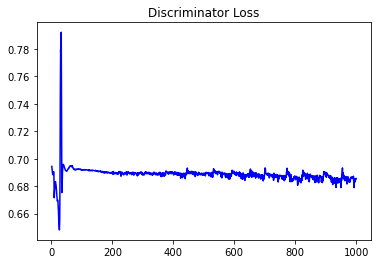

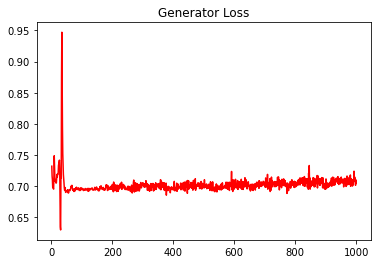

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5297862970823103


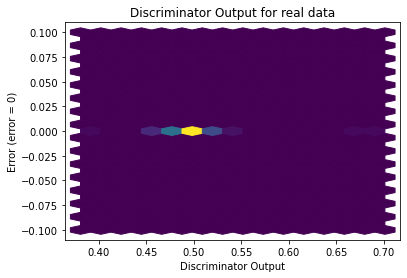

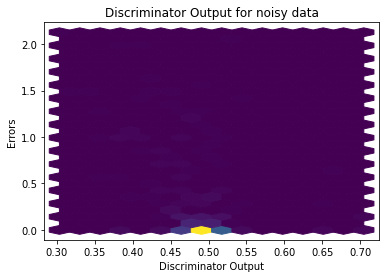

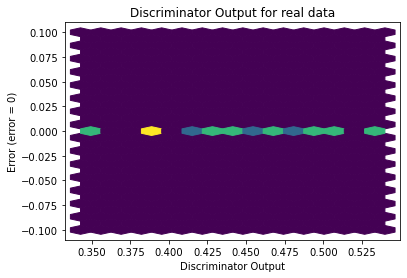

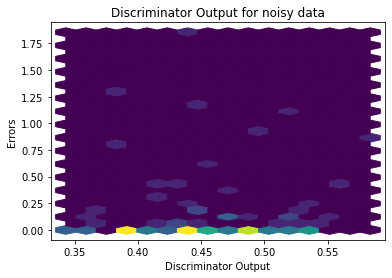

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


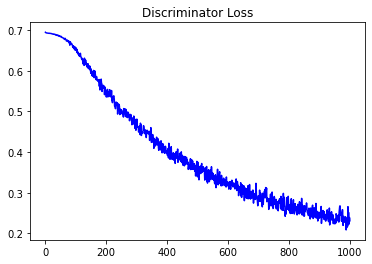

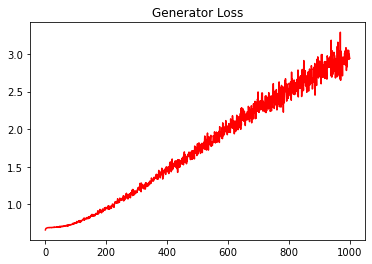

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6454813172149061


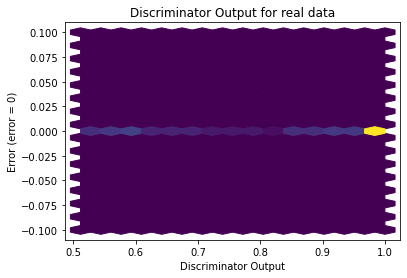

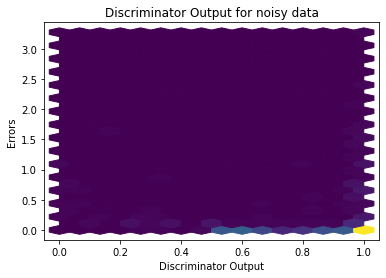

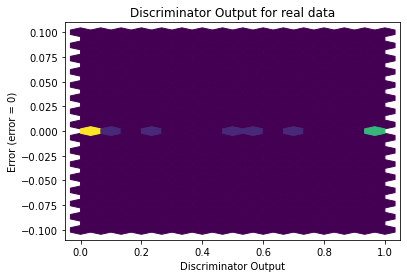

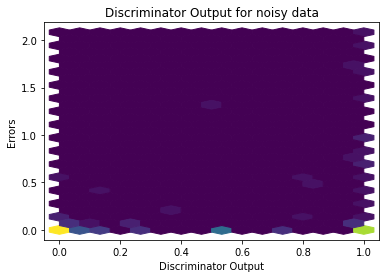

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
